# Taylor integration example: $\dot x=x^2$

Here, we will integrate the IVP defined by

$$
\begin{align}
\dot x &= x^2 \\
x(0)&=x_0
\end{align}
$$

The analytical solution for this problem is:

$$
x(t)=\frac{x_0}{1-x_0\cdot t}
$$

In particular, the analytical solution exhibits a divergence at $t=1/x_0$. How does a numerical integrator behave near this divergence? We will try two methods to integrate this problem:

+ Adaptive time-step, 4th-order, Runge-Kutta (ODE.jl)
+ Adaptive time-step, 28th-order, Taylor method (TaylorIntegration.jl)

We start off by including the relevant packages:

In [2]:
using TaylorIntegration, ODE, PyPlot

The ODE:

In [16]:
diffeq(t, x) = x.^2

diffeq (generic function with 1 method)

## 1. Adaptive time-step, 4th order, Runge Kutta method

We select $x_0=3$, $t_0=0$. Then, the singularity is at $t=1/3$.

In [19]:
@time tRK, xRK = ode45(diffeq, 3.0, [0.0, 1/3]);

  0.000546 seconds (6.02 k allocations: 173.453 KB)


Plot $x$ vs $t$:

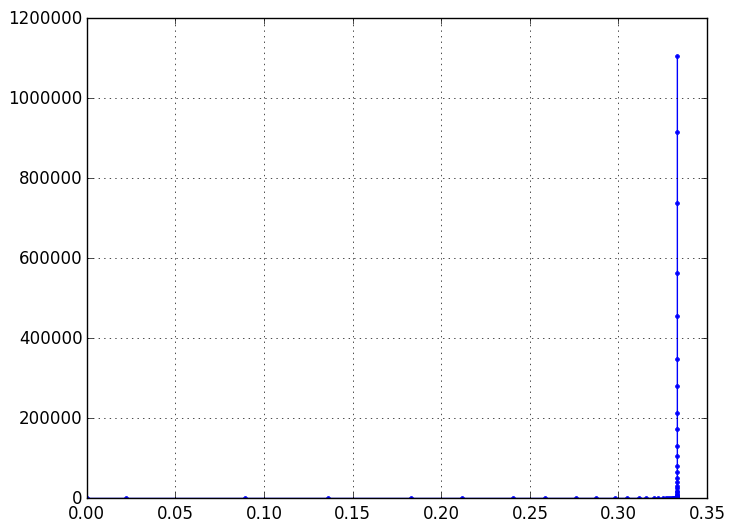

In [20]:
grid(true)
plot(tRK, xRK, ".-");

What is the final state of the system?

In [21]:
tRK[end], xRK[end]

(0.3333333333333333,1.1058875285062687e6)

How many steps did the RK integrator perform?

In [22]:
length(xRK)-1

54

How does the numerical solution compare to the analytical solution? The analytical solution is:

In [23]:
exactsol(t, x0) = x0./(1.0-x0.*t) #analytical solution

exactsol (generic function with 1 method)

The relative difference between the numerical and analytical solution, $\delta x$, is:

In [24]:
δxRK = (xRK-exactsol(tRK, 3.0))./exactsol(tRK, 3.0);

The $\delta x$ vs $t$ plot (logscale):

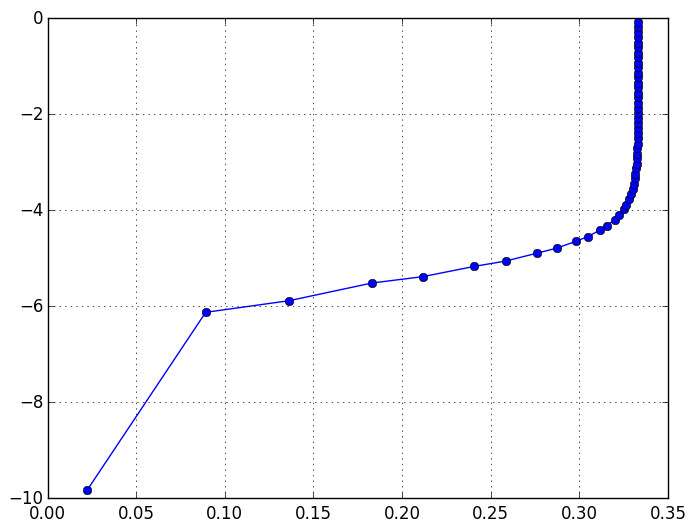

In [25]:
grid(true)
plot(tRK, log10(abs(δxRK)), "o-");

This plot means that the error of the numerical solution grows systematically; and at the end of the integration, the numerical solution is off of the analytical solution by

In [26]:
(xRK[end-1]-exactsol(tRK[end-1], 3.0))

-4.382528668724979e6

## 2. Adaptive time-step, 28th order, Taylor method

Again, we select $x_0=3$, $t_0=0$. The order of the Taylor integration is $28$, and we set the absolute tolerance equal to $10^{-20}$.

In [27]:
# Uncomment the line below if you want to test type stability for the Taylor integrator:

# @code_warntype taylorinteg(f, 3.0, 0.0, 0.3, 28, 1e-20, maxsteps=20);

In [35]:
@time tT, xT = taylorinteg(diffeq, 3.0, 0.0, 1/3, 28, 1e-20, maxsteps=length(xRK)-1);

  0.003209 seconds (12.51 k allocations: 791.188 KB)


In [29]:
tT[end], xT[end]

(0.3332761867505501,17498.859097033033)

How many steps did the Taylor integrator perform?

In [30]:
length(xT)-1

54

$x$ vs $t$ plot:

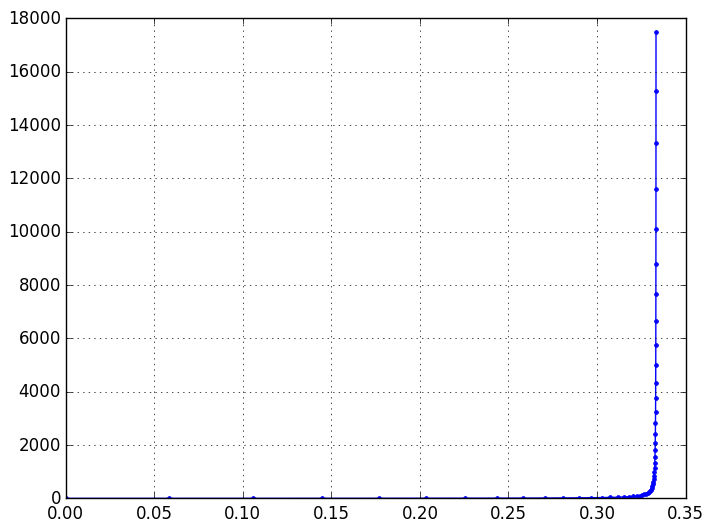

In [31]:
# axis([0, 0.35, -15, 10])
grid(true)
plot(tT, xT, ".-");

Does the integrator get past the singularity?

In [32]:
tT[end] > 1/3

false

The answer is no!

Now, the relative difference between the numerical and analytical solution, $\delta x$, is:

In [33]:
δxT = (xT.-exactsol(tT, 3.0))./exactsol(tT, 3.0);

The $\delta x$ vs $t$ plot (logscale):

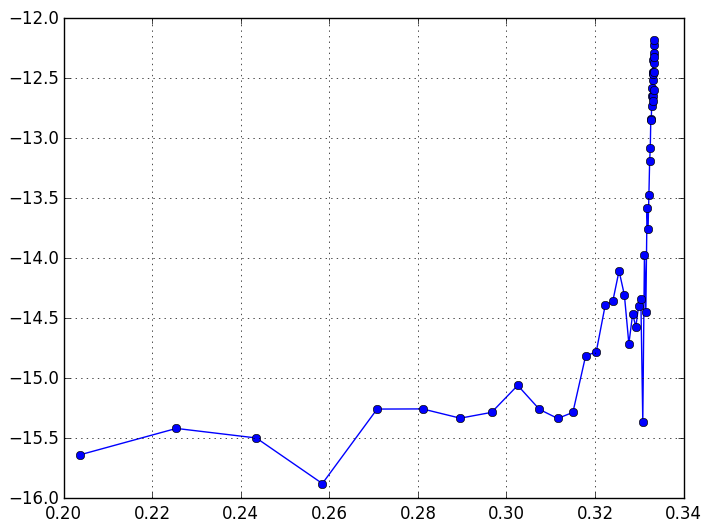

In [34]:
grid(true)
plot(tT, log10(abs(δxT)), "o-");

We observe that, while the execution time is ~10 times longer wrt 4th-order RK, the numerical solution obtained by the Taylor integrator stays within $10^{-12}$ of the analytical solution, for a same number of steps.

Now, that happens if the lower the absolute tolerance and the order of the Taylor method?

In [64]:
@time tT2, xT2 = taylorinteg(diffeq, 3.0, 0.0, 1/3, 10, 1e-5, maxsteps=length(xRK)-1);
(xT2[end].-exactsol(tT2[end], 3.0))./exactsol(tT2[end], 3.0)

  0.002638 seconds (4.74 k allocations: 210.688 KB)


-0.001943336433735918

A 10th order Taylor method with an absolute tolerance of $10^{-5}$ stays within $10^{-3}$ of the analytical solution.